## import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
bm_data = pd.read_excel('bm.xlsx')
bm_data.head()

,Keyword ID,Keyword Category,Country,Device,Cost,Clicks,Revenue,RPC,CPC,ROAS,Total Clickouts,Tracked Clickouts,Tracking Coverage,Booking Value
0,12136471,A,US,desktop,5714.33,1172,2013.58,NaN,4.875708,0.352374,926,515,0.556156,9748
1,91730045,A,Spain,phone,4691.94,17306,9912.34,NaN,0.271116,2.112631,13989,10587,0.756809,8313
2,119124300,A,US,phone,4671.65,2700,3924.61,NaN,1.730241,0.840091,1717,554,0.322656,4901
3,101751504,A,US,phone,2771.68,1947,2789.86,NaN,1.423564,1.006559,1247,432,0.346431,1778
4,12136471,A,US,phone,2743.42,1507,1999.14,NaN,1.820451,0.728704,869,441,0.507480,5658


In [3]:
bm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 14 columns):
Keyword ID           478 non-null int64
Keyword Category     478 non-null object
Country              478 non-null object
Device               478 non-null object
Cost                 478 non-null float64
Clicks               478 non-null int64
Revenue              478 non-null float64
RPC                  0 non-null float64
CPC                  478 non-null float64
ROAS                 478 non-null float64
Total Clickouts      478 non-null int64
Tracked Clickouts    478 non-null int64
Tracking Coverage    478 non-null float64
Booking Value        478 non-null int64
dtypes: float64(6), int64(5), object(3)
memory usage: 52.4+ KB


In [4]:
bm_data.describe()

,Keyword ID,Cost,Clicks,Revenue,RPC,CPC,ROAS,Total Clickouts,Tracked Clickouts,Tracking Coverage,Booking Value
count,4.780000e+02,478.000000,478.000000,478.000000,0.0,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,4.396471e+10,409.357552,432.062762,373.196025,NaN,1.583785,0.944025,303.778243,177.163180,0.520281,807.102510
std,1.080848e+11,510.001194,940.962438,584.998029,NaN,1.114576,0.588439,722.754712,531.318926,0.149161,1161.066144
min,1.000333e+07,161.150000,32.000000,33.880000,NaN,0.157548,0.164187,16.000000,3.000000,0.052632,0.000000
25%,9.520143e+07,192.580000,126.000000,132.397500,NaN,0.728995,0.517123,90.000000,41.250000,0.414789,0.000000
50%,2.538256e+08,254.925000,248.000000,234.190000,NaN,1.310063,0.776681,167.500000,76.000000,0.533124,388.500000
75%,1.183312e+10,402.797500,472.250000,430.400000,NaN,2.090618,1.170279,309.250000,169.750000,0.631627,1077.250000
max,5.216341e+11,5714.330000,17306.000000,9912.340000,NaN,5.852424,4.101981,13989.000000,10587.000000,0.942308,9748.000000


In [5]:
bm_data['RPC'] = bm_data['Revenue']/bm_data['Clicks']
bm_data.sort_index(by='RPC', ascending=False).head()

,Keyword ID,Keyword Category,Country,Device,Cost,Clicks,Revenue,RPC,CPC,ROAS,Total Clickouts,Tracked Clickouts,Tracking Coverage,Booking Value
293,297709444307,A,US,desktop,225.86,61,214.28,3.512787,3.702623,0.948729,70,39,0.557143,881
247,294306019,A,US,desktop,250.44,81,278.49,3.438148,3.091852,1.112003,97,58,0.597938,962
325,296475442491,A,US,desktop,212.37,76,227.75,2.996711,2.794342,1.072421,89,55,0.617978,1603
233,3398507837,A,US,desktop,258.95,48,125.32,2.610833,5.394792,0.483954,49,22,0.448980,1370
472,14360282,A,US,desktop,161.76,32,82.74,2.585625,5.055000,0.511499,21,13,0.619048,1498


**a) Answer**: `297709444307`, `294306019` and `296475442491` are the top performing keywords

## b) 1.

In [6]:
Overall_ROAS = bm_data['ROAS'].sum()
print(Overall_ROAS)

451.2437626342651


**Answer:** No. Our target is `478.00`. We're falling short.

## b) 2.

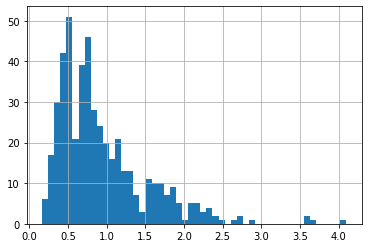

In [7]:
%matplotlib inline
bm_data['ROAS'].hist(bins=50)

Text(0, 0.5, 'ROAS')

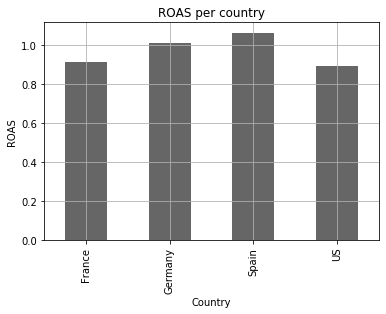

In [8]:
ROAS_country_plot = bm_data.groupby(['Country'])['ROAS'].mean().plot(kind='bar', title='ROAS per country', grid=True, colormap='Accent_r')
ROAS_country_plot.set_xlabel('Country')
ROAS_country_plot.set_ylabel('ROAS')

Text(0, 0.5, 'ROAS')

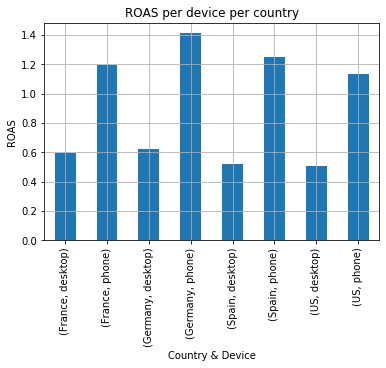

In [9]:
ROAS_plot = bm_data.groupby(['Country', 'Device'])['ROAS'].mean().plot(kind='bar', title='ROAS per device per country', grid=True)
ROAS_plot.set_xlabel('Country & Device')
ROAS_plot.set_ylabel('ROAS')

**Answer:** It is evident that US market, particularly in desktop devices is doing poorly. We may focus on generating either more revenue in this region on this device, by adding more tariffs or better SEO. This will raise the revenues and hence the overall ROAS to a more achievable 100%.

## b) 3.

## c) 1.

**Answer:** I understand the scenario as follows: 
`Total Click-outs`: Number of clicks on the booking website like `trivago.com` when I search say `Budapest` with dates.
`Tracked Click-outs`: Number of clicks tracked to hotel website. E.g. from `trivago.com` to `hotelbudapest.com`.

The coverage is below 100% because I as a user may not go on to book hotel. I'm simply checking out the cost and availability of a tour package, which is often the case.

I may also be using it to compare prices with a rival website.

So for above two reasons, the `Tracked click-outs` won't be matching the `Total click-outs` thereby reducing the coverage.

## c) 2.

**Answer:** It varies on keyword because the keyword determines where the user wants to stay. Keywords correspond to locations. E.g. if a user has a certain budget in mind for spending on accommodation, he may choose different locations. A stay in Manhattan will likely be more expensive than a stay in New Jersey. Therefore a certain user may choose to go with a cheaper option, thereby increasing coverage of some cheaper locations, ergo keywords than of of the more expensive ones. This also sheds some light on the user behaviour. We can correlate spending patterns with locations.

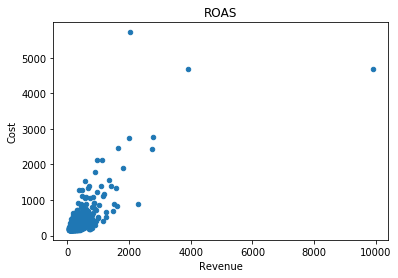

In [10]:
bm_data.plot.scatter(x='Revenue', y='Cost', title='ROAS')

## d)

In [11]:
bm_data['BVPtCO'] = bm_data['Booking Value']/bm_data['Tracked Clickouts']
bm_data.sample(3)

,Keyword ID,Keyword Category,Country,Device,Cost,Clicks,Revenue,RPC,CPC,ROAS,Total Clickouts,Tracked Clickouts,Tracking Coverage,Booking Value,BVPtCO
418,11833117594,A,US,phone,174.92,144,132.45,0.919792,1.214722,0.757203,69,23,0.333333,0,0.000000
422,116154900445,A,Germany,phone,174.15,694,714.36,1.029337,0.250937,4.101981,541,409,0.756007,0,0.000000
182,177481838,A,Germany,desktop,309.90,142,245.12,1.726197,2.182394,0.790965,179,72,0.402235,273,3.791667


In [13]:
bm_data.set_index('Keyword ID', inplace=True)

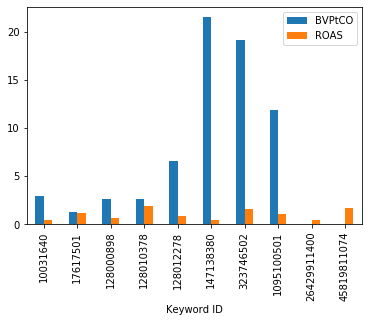

In [29]:
bm_data.sample(10).groupby(['Keyword ID'])['BVPtCO', 'ROAS'].mean().plot(kind='bar')

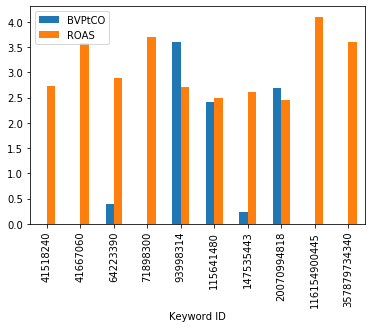

In [37]:
bm_data.sort_values(by='ROAS', ascending=False).head(10).groupby(['Keyword ID'])['BVPtCO', 'ROAS'].mean().plot(kind='bar')

**Answer:** No I wouldn't for following three reasons:
1. The `BVPtCO` metric does not exist for every keyword. It is not a reliable and all-encompassing metric.
2. Even if a keyword generates a certain greater than 1 `ROAS`, like for keyword ID `41518240` here, it has a `0` `BVPtCO`. Hence this metric will miss out key performances.
3. It has little correlation with highest performing keywords.

## e) 

In [14]:
bm_data.sample(3)

,Keyword Category,Country,Device,Cost,Clicks,Revenue,RPC,CPC,ROAS,Total Clickouts,Tracked Clickouts,Tracking Coverage,Booking Value,BVPtCO
Keyword ID,,,,,,,,,,,,,,
313797970731,A,Spain,phone,237.14,286,158.62,0.554615,0.829161,0.668888,294,137,0.465986,340,2.481752
1763094470,A,Germany,phone,598.27,828,599.60,0.724155,0.722548,1.002223,540,287,0.531481,0,0.000000
15043640,A,US,desktop,1279.14,283,465.38,1.644452,4.519929,0.363823,199,114,0.572864,4346,38.122807


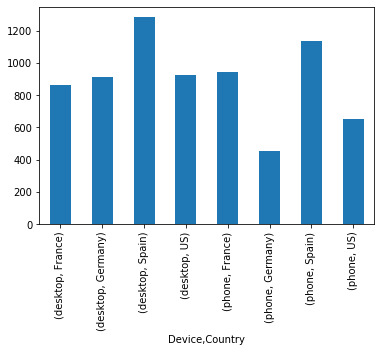

In [15]:
bm_data.groupby(['Device', 'Country'])['Booking Value'].mean().plot(kind='bar')

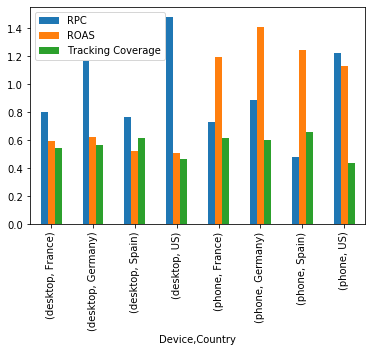

In [16]:
bm_data.groupby(['Device', 'Country'])['RPC','ROAS', 'Tracking Coverage'].mean().plot(kind='bar')

## e) 1.

**Key Observations**
- Tracking coverage is platform agnostic.
- Desktops in general provide a higher RPC than smartphones, with US being the biggest revenue generator
- However when cost of adverstising is considered, then ROAS is higher on phones than desktop devices.